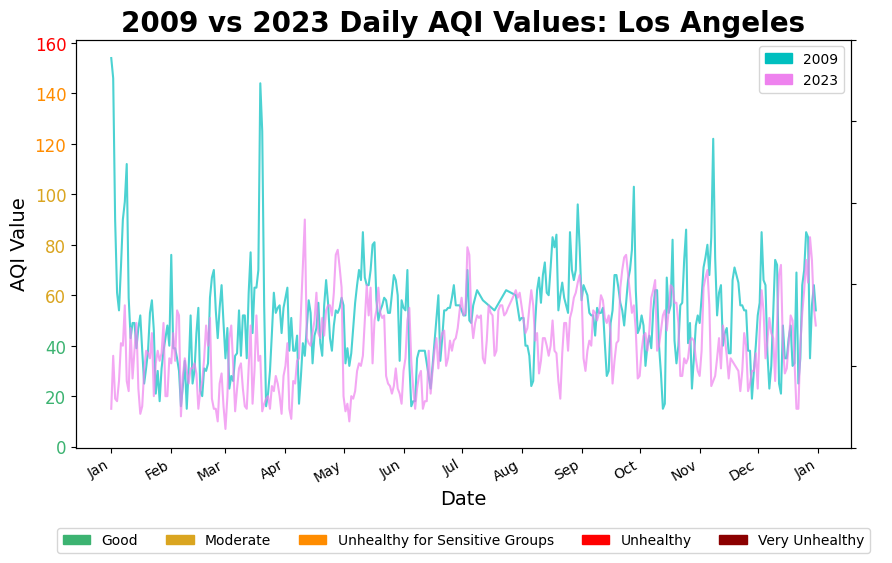

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import calendar
import matplotlib.patches as mpatches

aqs_FULL2009 = pd.read_csv('../data/2009_EPA_AQI_FULL.csv',
                parse_dates = ['Date'],
                index_col = ['Date']
                  )
aqs_FULL2009

aqs_FULL2009_ComparisonData = pd.read_csv('../data/2009_EPA_AQI_ComparisonData.csv',
                parse_dates = ['Date'],
                index_col = ['Date']
                  )
aqs_FULL2009_ComparisonData

aqs_FULL2023 = pd.read_csv('../data/2023_EPA_AQI_FULL.csv',
                parse_dates = ['Date'],
                index_col = ['Date']
                  )
aqs_FULL2023

aqs_FULL2023_ComparisonData = pd.read_csv('../data/2023_EPA_AQI_ComparisonData.csv',
                parse_dates = ['Date'],
                index_col = ['Date']
                  )
aqs_FULL2023_ComparisonData

def customize_tick_colors(ax):
    for tick in ax.get_yticklabels():
        try:
            tick_val = float(tick.get_text())
            if 0 <= tick_val <= 50:
                tick.set_color('mediumseagreen')
            elif 50 < tick_val <= 100:
                tick.set_color('goldenrod')
            elif 100 < tick_val <= 150:
                tick.set_color('darkorange')
            elif 150 < tick_val <= 200:
                tick.set_color('red')
            elif 200 < tick_val <= 300:
                tick.set_color('darkred')
        except ValueError:
            pass  # Skip non-numeric tick labels

fig,ax = plt.subplots(figsize=(10, 6))
ax.set_title('2009 vs 2023 Daily AQI Values: Los Angeles', fontweight='bold', fontsize=20)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('AQI Value', fontsize=14)
aqs_FULL2009_ComparisonData.loc[aqs_FULL2009_ComparisonData['Site Name']=='Los Angeles-North Main Street'].plot(y='DAILY_AQI_VALUE', label='LA',ax=ax, alpha =0.7, color='c')
#aqs_FULL2009_ComparisonData.loc[aqs_FULL2009_ComparisonData['Site Name']=='Glendora'].plot(y='DAILY_AQI_VALUE', label='Glendora',ax=ax, alpha =0.5, color='mediumblue')
#aqs_FULL2009_ComparisonData.loc[aqs_FULL2009_ComparisonData['Site Name']=='Compton'].plot(y='DAILY_AQI_VALUE', label='Compton',ax=ax, alpha =0.7, color='navy')
aqs_FULL2023_ComparisonData.loc[aqs_FULL2023_ComparisonData['Site Name']=='Los Angeles-North Main Street'].plot(y='DAILY_AQI_VALUE', label='LA',ax=ax, alpha =0.7, color='violet')
#aqs_FULL2023_ComparisonData.loc[aqs_FULL2023_ComparisonData['Site Name']=='Glendora'].plot(y='DAILY_AQI_VALUE', label='Glendora',ax=ax, alpha =0.7, color='purple')
#aqs_FULL2023_ComparisonData.loc[aqs_FULL2023_ComparisonData['Site Name']=='Compton'].plot(y='DAILY_AQI_VALUE', label='Compton',ax=ax, alpha =1, color='rebeccapurple')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
customize_tick_colors(ax)
ax.yaxis.set_tick_params(labelsize=12)
legend_elements1 = [
    mpatches.Patch(color='mediumseagreen', label='Good'),
    mpatches.Patch(color='goldenrod', label='Moderate'),
    mpatches.Patch(color='darkorange', label='Unhealthy for Sensitive Groups'),
    mpatches.Patch(color='red', label='Unhealthy'),
    mpatches.Patch(color='darkred', label='Very Unhealthy')
]
legend_elements2 = [
    mpatches.Patch(color='c', label='2009'),
    mpatches.Patch(color='violet', label='2023')
]
ax2 = ax.twinx()
def customize_tick_colors(ax2):    
    for tick in ax2.get_yticklabels():
        try:
            tick_val = float(tick.get_text())
            if 0 <= tick_val:
                tick.set_color('w')
        except ValueError:
            pass  # Skip non-numeric tick labels
customize_tick_colors(ax2)
ax.legend(handles=legend_elements1,  loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=5)
ax2.legend(handles=legend_elements2,  loc='upper right')

plt.show()